# Solar Power Generation Data

https://www.kaggle.com/anikannal/solar-power-generation-data

## Introduction

### About dataset

"This data has been gathered at two solar power plants in India over a 34 day period. It has two pairs of files - each pair has one power generation dataset and one sensor readings dataset. The power generation datasets are gathered at the inverter level - each inverter has multiple lines of solar panels attached to it. The sensor data is gathered at a plant level - single array of sensors optimally placed at the plant."

### Questions

1. Can we predict the power generation for next couple of days?
2. Can we identify the need for panel cleaning/maintenance?
3. Can we identify faulty or suboptimally performing equipment?

## Data Wrangling

In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [233]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Data Gathering

In [234]:
gen1 = pd.read_csv('Plant_1_Generation_Data.csv')

In [235]:
gen2 = pd.read_csv('Plant_2_Generation_Data.csv')

### Data Assessing and Cleaning

In [236]:
gen1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [237]:
gen2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_ID     67698 non-null  int64  
 2   SOURCE_KEY   67698 non-null  object 
 3   DC_POWER     67698 non-null  float64
 4   AC_POWER     67698 non-null  float64
 5   DAILY_YIELD  67698 non-null  float64
 6   TOTAL_YIELD  67698 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.6+ MB


> DATE_TIME을 datetime으로 변경

In [238]:
gen1.DATE_TIME = pd.to_datetime(gen1.DATE_TIME, format='%d-%m-%Y %H:%M')
gen2.DATE_TIME = pd.to_datetime(gen2.DATE_TIME, format='%Y-%m-%d %H:%M:%S')

In [239]:
# gen1과 gen2 합치기
gen = pd.concat([gen1, gen2])
gen

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0
...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.0,520758.0
67694,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.0,121131356.0
67695,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.0,2427691.0
67696,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.0,106896394.0


In [240]:
gen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136476 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   DATE_TIME    136476 non-null  datetime64[ns]
 1   PLANT_ID     136476 non-null  int64         
 2   SOURCE_KEY   136476 non-null  object        
 3   DC_POWER     136476 non-null  float64       
 4   AC_POWER     136476 non-null  float64       
 5   DAILY_YIELD  136476 non-null  float64       
 6   TOTAL_YIELD  136476 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 8.3+ MB


In [241]:
gen.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,1.364760e+05,136476.000000,136476.000000,136476.000000,1.364760e+05
mean,4.135497e+06,1708.541497,274.803511,3295.433783,3.303821e+08
std,4.999862e+02,3222.181273,380.182569,3035.294425,6.085705e+08
min,4.135001e+06,0.000000,0.000000,0.000000,0.000000e+00
25%,4.135001e+06,0.000000,0.000000,28.321429,6.520020e+06
50%,4.135001e+06,6.050000,3.506905,2834.803572,7.269333e+06
75%,4.136001e+06,1155.788333,532.673333,5992.000000,2.826096e+08
max,4.136001e+06,14471.125000,1410.950000,9873.000000,2.247916e+09


In [242]:
gen.isnull().sum()

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

## Exploratory Data Analysis

>* 특정 인버터의 발전량이 모든 인버터 발전량의 평균보다 현저히 적으면 유지보수가 필요한 상태일 수 있다.
>* 각 인버터의 매일 총 발전량의 추세를 통해 이후 며칠 동안의 발전량을 예측할 수 있을 것.

### Exploration

In [243]:
gen.SOURCE_KEY.nunique()

44

In [244]:
gen.SOURCE_KEY.unique()

array(['1BY6WEcLGh8j5v7', '1IF53ai7Xc0U56Y', '3PZuoBAID5Wc2HD',
       '7JYdWkrLSPkdwr4', 'McdE0feGgRqW7Ca', 'VHMLBKoKgIrUVDU',
       'WRmjgnKYAwPKWDb', 'ZnxXDlPa8U1GXgE', 'ZoEaEvLYb1n2sOq',
       'adLQvlD726eNBSB', 'bvBOhCH3iADSZry', 'iCRJl6heRkivqQ3',
       'ih0vzX44oOqAx2f', 'pkci93gMrogZuBj', 'rGa61gmuvPhdLxV',
       'sjndEbLyjtCKgGv', 'uHbuxQJl8lW7ozc', 'wCURE6d3bPkepu2',
       'z9Y9gH1T5YWrNuG', 'zBIq5rxdHJRwDNY', 'zVJPv84UY57bAof',
       'YxYtjZvoooNbGkE', '4UPUqMRk7TRMgml', '81aHJ1q11NBPMrL',
       '9kRcWv60rDACzjR', 'Et9kgGMDl729KT4', 'IQ2d7wF4YD8zU1Q',
       'LYwnQax7tkwH5Cb', 'LlT2YUhhzqhg5Sw', 'Mx2yZCDsyf6DPfv',
       'NgDl19wMapZy17u', 'PeE6FRyGXUgsRhN', 'Qf4GUc1pJu5T6c6',
       'Quc1TzYxW2pYoWX', 'V94E5Ben1TlhnDV', 'WcxssY2VbP4hApt',
       'mqwcsP2rE7J0TFp', 'oZ35aAeoifZaQzV', 'oZZkBaNadn6DNKz',
       'q49J1IKaHRwDQnt', 'rrq4fwE8jgrTyWY', 'vOuJvMaM2sgwLmb',
       'xMbIugepa2P7lBB', 'xoJJ8DcxJEcupym'], dtype=object)

In [245]:
gen.DC_POWER.value_counts()

0.000000        67613
66.000000           7
0.520000            7
376.000000          6
28.000000           6
                ...  
13337.142860        1
12791.750000        1
12883.714290        1
12873.285710        1
3.907143            1
Name: DC_POWER, Length: 63607, dtype: int64

>발전량이 없는 구간이 매우 많다. (삭제해야 할까?)

### Visualization

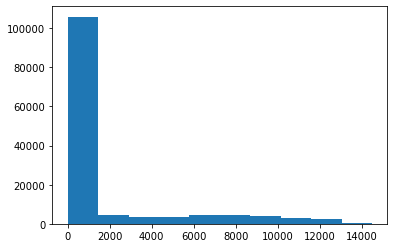

In [246]:
plt.hist(gen.DC_POWER);

In [521]:
# 같은 시간 상의 인버터들의 데이터를 평균 내면?
gen_time_group = gen.groupby('DATE_TIME', as_index=False).mean()
gen_time_group

,DATE_TIME,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4.135513e+06,0.0,0.0,1137.207863,3.333297e+08
1,2020-05-15 00:15:00,4.135513e+06,0.0,0.0,660.488372,3.333297e+08
2,2020-05-15 00:30:00,4.135513e+06,0.0,0.0,660.488372,3.333297e+08
3,2020-05-15 00:45:00,4.135513e+06,0.0,0.0,660.488372,3.333297e+08
4,2020-05-15 01:00:00,4.135501e+06,0.0,0.0,602.636364,3.259172e+08
...,...,...,...,...,...,...
3258,2020-06-17 22:45:00,4.135501e+06,0.0,0.0,5059.340909,3.261414e+08
3259,2020-06-17 23:00:00,4.135501e+06,0.0,0.0,5059.340909,3.261414e+08
3260,2020-06-17 23:15:00,4.135501e+06,0.0,0.0,5059.340909,3.261414e+08
3261,2020-06-17 23:30:00,4.135501e+06,0.0,0.0,5059.340909,3.261414e+08


In [522]:
#하루 동안의 POWER 변화 살펴보기
hour_min_mean = gen_time_group.groupby([gen_time_group.DATE_TIME.dt.hour, gen_time_group.DATE_TIME.dt.minute]).mean()
hour_min_mean['TIME'] = ['{}:{}'.format(pair[0],pair[1]) for pair in hour_min_mean.index]
#plt.plot('TIME', 'DC_POWER', data=hour_min_mean)
#plt.plot('TIME', 'AC_POWER', data=hour_min_mean)
#plt.xticks(rotation=90);

In [523]:
hour_min_mean.TIME = pd.to_datetime(hour_min_mean.TIME, format='%H:%M')
#hour_min_mean

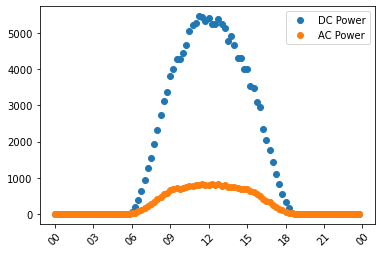

In [525]:
fig, ax = plt.subplots()

plt.plot_date('TIME', 'DC_POWER', data=hour_min_mean, label='DC Power')
plt.plot_date('TIME', 'AC_POWER', data=hour_min_mean, label='AC Power')
plt.legend()
plt.xticks(rotation=45);

import matplotlib.dates as mdates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))

> 정상 작동 중이냐의 여부는 낮 시간에만 알 수 있을 것.
>
> 밤 시간 대부분에서 완전히 0으로 떨어진다

### Answers to questions

#### Can we identify faulty or suboptimally performing equipment?

In [249]:
# 각 SOURCE KEY의 하루 발전량 꺾은선 그래프 (특별히 발전량이 떨어지는 패널이 있는지)
# 월별로 나누기
gen1_may = gen1[gen1.DATE_TIME.dt.month==5]
gen1_june = gen1[gen1.DATE_TIME.dt.month==6]
gen2_may = gen2[gen2.DATE_TIME.dt.month==5]
gen2_june = gen2[gen2.DATE_TIME.dt.month==6]

gen1_may['DAY'] = gen1_may.DATE_TIME.dt.day
gen1_june['DAY'] = gen1_june.DATE_TIME.dt.day
gen2_may['DAY'] = gen2_may.DATE_TIME.dt.day
gen2_june['DAY'] = gen2_june.DATE_TIME.dt.day

/var/folders/hb/vlbp26l11sjbyrlyv47j10c40000gn/T/ipykernel_18319/657476546.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen1_may['DAY'] = gen1_may.DATE_TIME.dt.day
/var/folders/hb/vlbp26l11sjbyrlyv47j10c40000gn/T/ipykernel_18319/657476546.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen1_june['DAY'] = gen1_june.DATE_TIME.dt.day
/var/folders/hb/vlbp26l11sjbyrlyv47j10c40000gn/T/ipykernel_18319/657476546.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [250]:
# plot 그리는 함수 정의
def daily_source_keys(df):
    unique_keys = df.SOURCE_KEY.unique()
    for unique_key in unique_keys:
        sub_df = df[df.SOURCE_KEY==unique_key]
        groupby_df = sub_df.groupby('DAY', as_index=False)['DAILY_YIELD'].max()
        plt.plot('DAY', 'DAILY_YIELD', data=groupby_df, label=unique_key)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.ylabel('Daily yield')

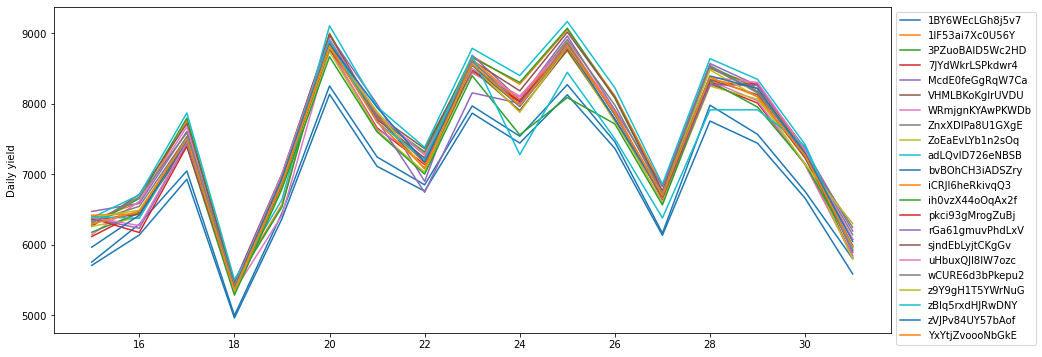

In [251]:
plt.figure(figsize=(15,6))
daily_source_keys(gen1_may)

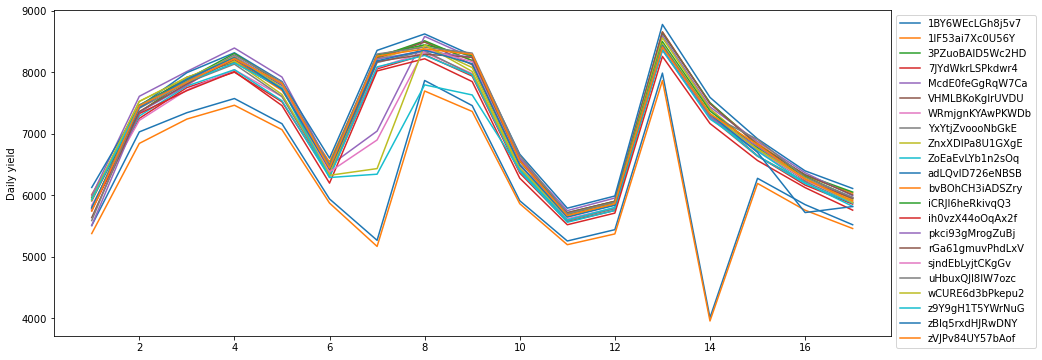

In [252]:
plt.figure(figsize=(15,6))
daily_source_keys(gen1_june)

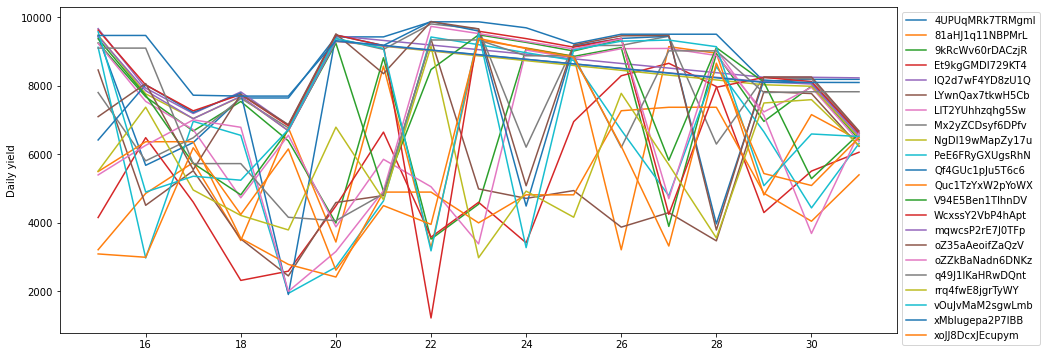

In [253]:
plt.figure(figsize=(15,6))
daily_source_keys(gen2_may)

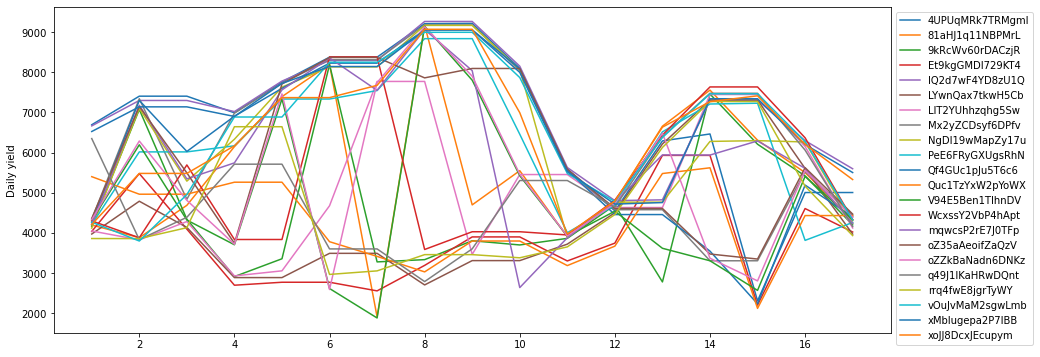

In [254]:
plt.figure(figsize=(15,6))
daily_source_keys(gen2_june)

>1번 발전소에서는 인버터별 발전량이 상대적으로 균일하여 성능이 떨어지는 인버터 그룹을 특정짓기 쉽다.  
>반면 2번 발전소에서는 인버터 간 발전량의 차이가 크고 제각각이다. 많은 인버터 그룹들에 문제가 있다고 볼 수 있을 것이다.

#### Can we identify the need for panel cleaning/maintenance?

>어떤 패널에 어느정도의 성능저하가 있는지 어떻게 알 수 있을까?
>
>해당 plant에서 어느 날의 max yield에 비교하여 몇 %의 yield를 내는지 percentage를 계산.  
>    한계점: max yield를 내는 패널그룹조차 문제 있는 것일 수도 있다.  
>(5일정도의 성능을 평균내 볼 수도 있을 것이다.)  
>하루라도 발전량이 크게 떨어지는 패널그룹이 있다면 문제가 있다고 볼 수 있다. threshold는?

In [255]:
# 성능 %를 구해주는 함수를 정의
def performance(df):
    group_key_day = df.groupby(['SOURCE_KEY','DAY'], as_index=False)['DAILY_YIELD'].max()
    group_key_day_pivot = pd.pivot_table(group_key_day, index='SOURCE_KEY', values='DAILY_YIELD', columns='DAY')
    return group_key_day_pivot / group_key_day_pivot.max() * 100

In [256]:
gen1_may_p = performance(gen1_may)
gen1_june_p = performance(gen1_june)
gen2_may_p = performance(gen2_may)
gen2_june_p = performance(gen2_june)

In [257]:
# 한달 중 성능이 70% 이하로 떨어지는 날이 10일 이상이면 문제가 발생했다고 가정
gen1_may_p[(gen1_may_p <= 70).sum(axis=1) >= 10]

DAY,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
SOURCE_KEY,,,,,,,,,,,,,,,,,


In [258]:
gen1_june_p[(gen1_june_p <= 70).sum(axis=1) >= 10]

DAY,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
SOURCE_KEY,,,,,,,,,,,,,,,,,


In [259]:
gen2_may_p[(gen2_may_p <= 70).sum(axis=1) >= 10]

DAY,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
SOURCE_KEY,,,,,,,,,,,,,,,,,
Et9kgGMDl729KT4,42.988720,68.494453,59.608910,29.675109,33.640852,47.229524,70.529555,36.280766,46.618676,35.260116,75.357762,87.243448,91.074624,83.938533,52.077529,66.751484,73.626641
LYwnQax7tkwH5Cb,87.529753,47.659095,71.471121,45.139422,31.847713,48.280938,50.875517,94.743239,50.580959,48.647812,53.555941,40.774655,45.216293,36.564572,94.803150,94.159700,75.765678
Quc1TzYxW2pYoWX,56.866398,67.247755,82.426832,45.382451,36.213617,25.433708,51.957975,49.589790,40.535334,49.710983,52.211622,76.507736,77.570782,77.570782,58.909752,49.024597,65.617404
rrq4fwE8jgrTyWY,56.990583,77.886952,64.193214,53.914045,49.272349,71.391021,49.612650,92.656741,30.234209,50.825764,45.132264,81.844016,59.951584,37.459215,90.793459,91.990791,76.033058
xoJJ8DcxJEcupym,31.998344,31.642895,80.147630,54.272192,79.976611,27.515508,47.766104,40.048617,95.102910,93.734517,95.761058,65.603621,34.975266,91.106199,65.863113,61.650309,78.828391


In [260]:
gen2_june_p[(gen2_june_p <= 70).sum(axis=1) >= 10]

DAY,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
SOURCE_KEY,,,,,,,,,,,,,,,,,
9kRcWv60rDACzjR,62.208607,95.529444,58.603458,41.452991,43.116082,97.697722,39.079089,35.963303,41.046951,45.368666,68.632562,97.466251,41.721755,97.694524,81.307309,85.079315,75.000000
Et9kgGMDl729KT4,60.295876,73.960022,55.267423,38.390313,35.595835,33.031134,30.466420,34.419860,42.072315,47.822353,58.627349,77.736241,89.077524,77.665706,28.805345,72.326056,71.837026
LYwnQax7tkwH5Cb,59.324567,64.654241,55.848190,41.096866,37.087029,41.619945,41.619945,29.163519,35.704263,40.583977,66.073502,93.457944,93.344351,95.755829,95.755829,88.016334,70.907791
Quc1TzYxW2pYoWX,80.678422,67.017828,67.017828,74.943020,67.630801,45.079327,40.713348,32.671344,40.971398,46.570973,56.583655,76.178609,82.286659,73.615405,27.744302,69.577509,79.163688
V94E5Ben1TlhnDV,64.345487,83.643976,58.319827,52.749288,94.305181,31.170225,22.414410,98.704803,84.209390,66.531714,69.627752,94.267913,54.311899,43.280063,33.612785,84.922255,77.269478


>발전소 1에서는 기준을 만족하는 문제를 발견할 수 없었고, 발전소 2에서는 문제가 발생한 인버터 그룹들을 특정지을 수 있었다.

#### Can we predict the power generation for next couple of days?

>발전량을 예측할 수 있을까?  
>각 인버터의 5일 동안의 데이터로 부터 다음 1일의 발전량을 예측하기.  
>다른 인버터에 비해 현저히 낮다면? 경고

In [261]:
# 매일의 발전량 함수
def daily_key(df):
    group_key_day = df.groupby(['SOURCE_KEY','DAY'], as_index=False)['DAILY_YIELD'].max()
    group_key_day_pivot = pd.pivot_table(group_key_day, index='SOURCE_KEY', values='DAILY_YIELD', columns='DAY')
    return group_key_day_pivot

In [262]:
gen1_may_daily = daily_key(gen1_may)
gen1_june_daily = daily_key(gen1_june)
gen2_may_daily = daily_key(gen2_may)
gen2_june_daily = daily_key(gen2_june)

In [263]:
gen2_may_daily = gen2_may_daily.dropna()

> 10개 데이터로 1개를 예측한다면?

In [264]:
def split_ten_one(df):
    X1_may = pd.DataFrame()
    y1_may = pd.DataFrame()
    for i in range(0,len(df.columns)-10):
        df1 = df.iloc[:,i:i+10]
        df1 = df1.rename(columns={df1.columns[0]:'one',df1.columns[1]:'two',df1.columns[2]:'three',df1.columns[3]:'four',df1.columns[4]:'five',
                                  df1.columns[5]:'six',df1.columns[6]:'seven',df1.columns[7]:'eight',df1.columns[8]:'nine',df1.columns[9]:'ten'})
        X1_may = pd.concat([X1_may,df1])
        df2 = df.iloc[:,i+10]
        y1_may = pd.concat([y1_may,df2])
    return X1_may, y1_may

In [265]:
X1_may, y1_may = split_ten_one(gen1_may_daily)
X1_june, y1_june = split_ten_one(gen1_june_daily)
X2_may, y2_may = split_ten_one(gen2_may_daily)
X2_june, y2_june = split_ten_one(gen2_june_daily)

In [266]:
X1 = pd.concat([X1_may,X1_june])
y1 = pd.concat([y1_may,y1_june])

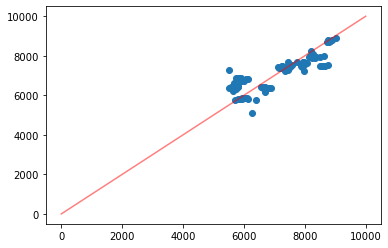

In [267]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

mlr = LinearRegression()

mlr.fit(X_train, y_train)

preds = mlr.predict(X_test)

plt.scatter(y_test, preds)
plt.xlabel("")
plt.ylabel("")

x_axis = np.linspace(0, 10000)
y_axis = x_axis
plt.plot(x_axis,y_axis,'r-', alpha=0.5)

In [268]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 590.613649


In [269]:
mlr.score(X_test, y_test)

0.7060153596578249

In [270]:
X2 = pd.concat([X2_may,X2_june])
y2 = pd.concat([y2_may,y2_june])

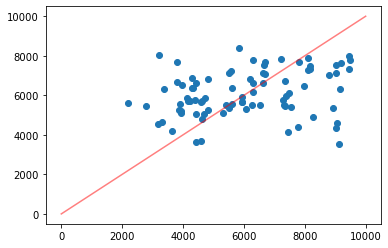

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

mlr = LinearRegression()

mlr.fit(X_train, y_train)

preds = mlr.predict(X_test)

plt.scatter(y_test, preds)
plt.xlabel("")
plt.ylabel("")

x_axis = np.linspace(0, 10000)
y_axis = x_axis
plt.plot(x_axis,y_axis,'r-', alpha=0.5)

In [272]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 1958.492776


In [273]:
mlr.score(X_test, y_test)

-0.044854931664603415

> 발전소 1은 상대적으로 예측 가능성이 있지만, 발전소 2는 이 모델로 예측이 불가능하다.

In [274]:
def split_five_one(df):
    X1_may = pd.DataFrame()
    y1_may = pd.DataFrame()
    for i in range(0,len(df.columns)-5):
        df1 = df.iloc[:,i:i+5]
        df1 = df1.rename(columns={df1.columns[0]:'one',df1.columns[1]:'two',df1.columns[2]:'three',df1.columns[3]:'four',df1.columns[4]:'five'})
        X1_may = pd.concat([X1_may,df1])
        df2 = df.iloc[:,i+5]
        y1_may = pd.concat([y1_may,df2])
    return X1_may, y1_may

In [275]:
X1_may, y1_may = split_five_one(gen1_may_daily)
X1_june, y1_june = split_five_one(gen1_june_daily)
X2_may, y2_may = split_five_one(gen2_may_daily)
X2_june, y2_june = split_five_one(gen2_june_daily)

In [276]:
X = pd.concat([X1_may,X1_june,X2_may,X2_june])
y = pd.concat([y1_may,y1_june,y2_may,y2_june])

In [277]:
inverters = X.index.unique()
inverters

Index(['1BY6WEcLGh8j5v7', '1IF53ai7Xc0U56Y', '3PZuoBAID5Wc2HD',
       '7JYdWkrLSPkdwr4', 'McdE0feGgRqW7Ca', 'VHMLBKoKgIrUVDU',
       'WRmjgnKYAwPKWDb', 'YxYtjZvoooNbGkE', 'ZnxXDlPa8U1GXgE',
       'ZoEaEvLYb1n2sOq', 'adLQvlD726eNBSB', 'bvBOhCH3iADSZry',
       'iCRJl6heRkivqQ3', 'ih0vzX44oOqAx2f', 'pkci93gMrogZuBj',
       'rGa61gmuvPhdLxV', 'sjndEbLyjtCKgGv', 'uHbuxQJl8lW7ozc',
       'wCURE6d3bPkepu2', 'z9Y9gH1T5YWrNuG', 'zBIq5rxdHJRwDNY',
       'zVJPv84UY57bAof', '4UPUqMRk7TRMgml', '81aHJ1q11NBPMrL',
       '9kRcWv60rDACzjR', 'Et9kgGMDl729KT4', 'LYwnQax7tkwH5Cb',
       'LlT2YUhhzqhg5Sw', 'Mx2yZCDsyf6DPfv', 'PeE6FRyGXUgsRhN',
       'Qf4GUc1pJu5T6c6', 'Quc1TzYxW2pYoWX', 'V94E5Ben1TlhnDV',
       'WcxssY2VbP4hApt', 'oZ35aAeoifZaQzV', 'oZZkBaNadn6DNKz',
       'q49J1IKaHRwDQnt', 'rrq4fwE8jgrTyWY', 'vOuJvMaM2sgwLmb',
       'xoJJ8DcxJEcupym', 'IQ2d7wF4YD8zU1Q', 'NgDl19wMapZy17u',
       'mqwcsP2rE7J0TFp', 'xMbIugepa2P7lBB'],
      dtype='object', name='SOURCE_KEY')

In [278]:
X = X[X.index=='McdE0feGgRqW7Ca']
y = y[y.index=='McdE0feGgRqW7Ca']

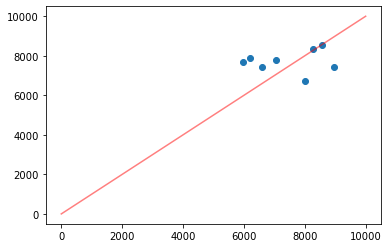

In [279]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

mlr = LinearRegression()

mlr.fit(X_train, y_train)

preds = mlr.predict(X_test)

plt.scatter(y_test, preds)
plt.xlabel("")
plt.ylabel("")

x_axis = np.linspace(0, 10000)
y_axis = x_axis
plt.plot(x_axis,y_axis,'r-', alpha=0.5)

In [280]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 1176.505967


In [281]:
mlr.score(X_test, y_test)

-0.20703819267947066

> 날씨 데이터를 활용한 발전량 예측

In [282]:
weather1 = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')
weather2 = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')

In [283]:
weather1.DATE_TIME = pd.to_datetime(weather1.DATE_TIME, format='%Y-%m-%d %H:%M:%S')
weather2.DATE_TIME = pd.to_datetime(weather2.DATE_TIME, format='%Y-%m-%d %H:%M:%S')

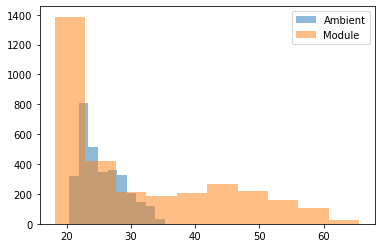

In [284]:
plt.hist(weather1.AMBIENT_TEMPERATURE, alpha=0.5, label='Ambient')
plt.hist(weather1.MODULE_TEMPERATURE, alpha=0.5, label='Module')
plt.legend()

> weather와 gen을 merge. 같은 DATE_TIME에는 같은 날씨 데이터가 들어감.

In [285]:
solar1 = gen1.merge(weather1, how='left', on='DATE_TIME')
solar2 = gen2.merge(weather2, how='left', on='DATE_TIME')

In [286]:
solar1

,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
68773,2020-06-17 23:45:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,4135001.0,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0
68774,2020-06-17 23:45:00,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,4135001.0,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0
68775,2020-06-17 23:45:00,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,4135001.0,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0
68776,2020-06-17 23:45:00,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,4135001.0,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0


In [287]:
solar2

,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.000000,5.207580e+05,4136001,iq8k7ZNt4Mwm3w0,23.202871,22.535908,0.0
67694,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.000000,1.211314e+08,4136001,iq8k7ZNt4Mwm3w0,23.202871,22.535908,0.0
67695,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.000000,2.427691e+06,4136001,iq8k7ZNt4Mwm3w0,23.202871,22.535908,0.0
67696,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.000000,1.068964e+08,4136001,iq8k7ZNt4Mwm3w0,23.202871,22.535908,0.0


> POWER가 0인 row들을 어떻게 할 것인가?

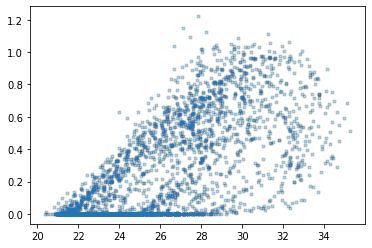

In [288]:
# AMBIENT_TEMPERATURE와 IRRADIATION의 관계는?
plt.scatter(x='AMBIENT_TEMPERATURE', y='IRRADIATION', data=solar1, marker='.', alpha=0.01)

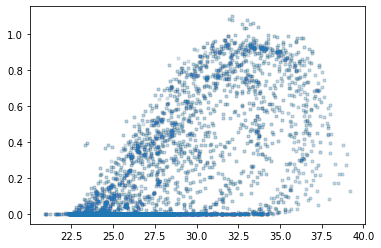

In [289]:
plt.scatter(x='AMBIENT_TEMPERATURE', y='IRRADIATION', data=solar2, marker='.', alpha=0.01)

>발전량이 있는 낮시간만을 고려한다면?

In [290]:
solar1_day = solar1[(solar1.DC_POWER!=0)|(solar1.AC_POWER!=0)]
solar2_day = solar2[(solar2.DC_POWER!=0)|(solar2.AC_POWER!=0)]

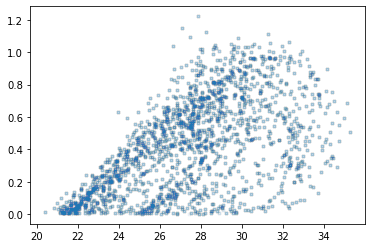

In [291]:
plt.scatter(x='AMBIENT_TEMPERATURE', y='IRRADIATION', data=solar1_day, marker='.', alpha=0.01)

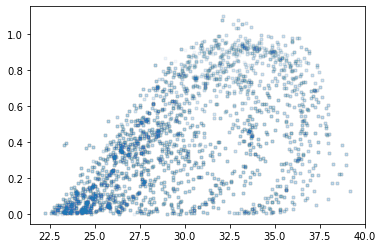

In [292]:
plt.scatter(x='AMBIENT_TEMPERATURE', y='IRRADIATION', data=solar2_day, marker='.', alpha=0.01)

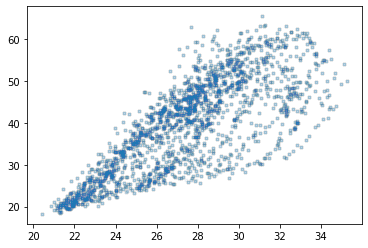

In [293]:
# AMBIENT_TEMPERATURE와 MODULE_TEMPERATURE의 관계
plt.scatter(x='AMBIENT_TEMPERATURE', y='MODULE_TEMPERATURE', data=solar1_day, marker='.', alpha=0.01)

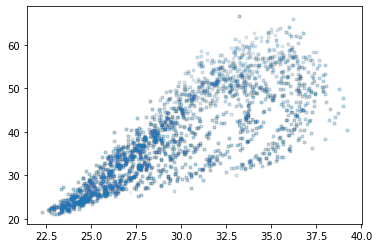

In [294]:
plt.scatter(x='AMBIENT_TEMPERATURE', y='MODULE_TEMPERATURE', data=solar2_day, marker='.', alpha=0.01)

>양의 상관관계들을 보여주고 있지만, 경향이 강하지 않다.

In [396]:
# 하루 동안의 총 일사량과 하루 평균 기온 사이의 관계 (해가 떠 있을 때)
irrad_sum = solar1_day.groupby([solar1_day.DATE_TIME.dt.month, solar1_day.DATE_TIME.dt.day]).IRRADIATION.sum()

In [397]:
amb_temp_mean = solar1_day.groupby([solar1_day.DATE_TIME.dt.month, solar1_day.DATE_TIME.dt.day]).AMBIENT_TEMPERATURE.mean()

<AxesSubplot:xlabel='AMBIENT_TEMPERATURE', ylabel='IRRADIATION'>

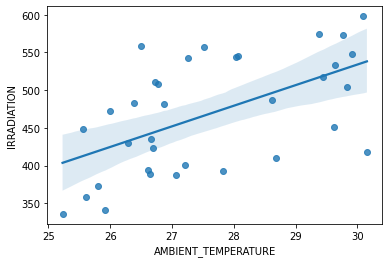

In [398]:
sns.regplot(x=amb_temp_mean, y=irrad_sum)

>하루 동안의 총 일사량과 하루 평균 기온 사이의 관계 또한 약한 양의 상관관계를 보여준다.

>Multi linear regression 모델을 이용한다. AMBIENT_TEMPERATURE, MODULE_TEMPERATURE, IRRADIATION 세 가지 특성을 이용해서  
>DAILY_YIELD와의 관계를 찾는다.

In [399]:
mod_temp_mean = solar1_day.groupby([solar1_day.DATE_TIME.dt.month, solar1_day.DATE_TIME.dt.day])['MODULE_TEMPERATURE'].mean()

In [400]:
daily_yield = solar1_day.groupby([solar1_day.DATE_TIME.dt.month, solar1_day.DATE_TIME.dt.day])['DAILY_YIELD'].max()

In [410]:
X = pd.concat([amb_temp_mean,mod_temp_mean,irrad_sum],axis=1)

In [411]:
y = daily_yield

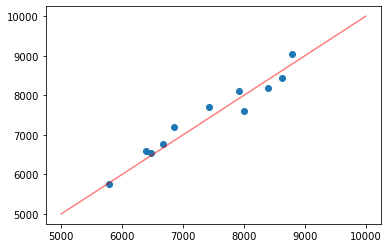

In [412]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

mlr = LinearRegression()

mlr.fit(X_train, y_train)

preds = mlr.predict(X_test)

plt.scatter(y_test, preds)
plt.xlabel("")
plt.ylabel("")

x_axis = np.linspace(5000, 10000)
y_axis = x_axis
plt.plot(x_axis,y_axis,'r-', alpha=0.5)

In [413]:
mlr.coef_

array([-374.42173354,  248.51814065,    7.11440185])

In [414]:
X.describe().loc['std']

AMBIENT_TEMPERATURE     1.539231
MODULE_TEMPERATURE      3.503503
IRRADIATION            74.904776
Name: std, dtype: float64

In [415]:
# feature importance
abs(mlr.coef_) * X.describe().loc['std'] / (abs(mlr.coef_) * X.describe().loc['std']).iloc[1]

AMBIENT_TEMPERATURE    0.661918
MODULE_TEMPERATURE     1.000000
IRRADIATION            0.612051
Name: std, dtype: float64

In [416]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 234.802661


In [417]:
mlr.score(X_test, y_test)

0.9413035273943154

>Plant 2의 경우는?

In [349]:
# 하루 동안의 총 일사량과 하루 평균 기온 사이의 관계 (해가 떠 있을 때)
irrad_sum = solar2_day.groupby([solar2_day.DATE_TIME.dt.month, solar2_day.DATE_TIME.dt.day]).IRRADIATION.sum()

In [350]:
amb_temp_mean = solar2_day.groupby([solar2_day.DATE_TIME.dt.month, solar2_day.DATE_TIME.dt.day]).AMBIENT_TEMPERATURE.mean()

<AxesSubplot:xlabel='AMBIENT_TEMPERATURE', ylabel='IRRADIATION'>

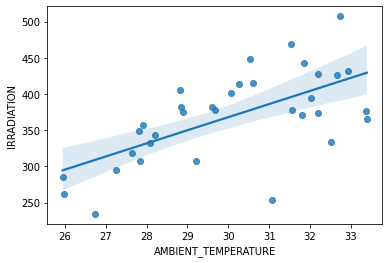

In [351]:
sns.regplot(x=amb_temp_mean, y=irrad_sum)

In [352]:
mod_temp_mean = solar2_day.groupby([solar2_day.DATE_TIME.dt.month, solar2_day.DATE_TIME.dt.day])['MODULE_TEMPERATURE'].mean()

In [353]:
daily_yield = solar2_day.groupby([solar2_day.DATE_TIME.dt.month, solar2_day.DATE_TIME.dt.day])['DAILY_YIELD'].max()

In [354]:
X = pd.concat([amb_temp_mean,mod_temp_mean,irrad_sum],axis=1)

In [355]:
y = daily_yield

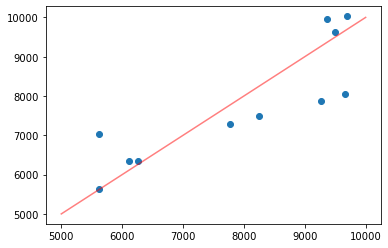

In [356]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

mlr = LinearRegression()

mlr.fit(X_train, y_train)

preds = mlr.predict(X_test)

plt.scatter(y_test, preds)
plt.xlabel("")
plt.ylabel("")

x_axis = np.linspace(5000, 10000)
y_axis = x_axis
plt.plot(x_axis,y_axis,'r-', alpha=0.5)

In [357]:
mlr.coef_

array([ 55.47242147, 344.52149958,  -7.08190636])

In [358]:
X.describe().loc['std']

AMBIENT_TEMPERATURE     2.211270
MODULE_TEMPERATURE      4.350155
IRRADIATION            62.408760
Name: std, dtype: float64

In [359]:
# feature importance
abs(mlr.coef_) * X.describe().loc['std'] / (abs(mlr.coef_) * X.describe().loc['std']).iloc[1]

AMBIENT_TEMPERATURE    0.081846
MODULE_TEMPERATURE     1.000000
IRRADIATION            0.294900
Name: std, dtype: float64

In [360]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 846.755141


In [361]:
mlr.score(X_test, y_test)

0.7302832599764136

>하루 동안의 평균 기온과, 모듈의 평균 온도와, 총 조도를 알 수 있다면 그 날의 발전량을 예측할 수 있다.  
>문제는 일기 예보로는 평균 기온 정도만 얻을 수 있다는 점이다.  
>일기 예보에서 구름의 양 등의 추가 데이터를 수집한다면 조도 또한 예측할 수 있을 것이다.

>'AMBIENT_TEMPERATURE'와 'IRRADIATION'으로부터 'MODULE_TEMPERATURE'를 예측할 수 있을까?

In [362]:
irrad_sum = solar1_day.groupby([solar1_day.DATE_TIME.dt.month, solar1_day.DATE_TIME.dt.day]).IRRADIATION.sum()
amb_temp_mean = solar1_day.groupby([solar1_day.DATE_TIME.dt.month, solar1_day.DATE_TIME.dt.day]).AMBIENT_TEMPERATURE.mean()
mod_temp_mean = solar1_day.groupby([solar1_day.DATE_TIME.dt.month, solar1_day.DATE_TIME.dt.day]).MODULE_TEMPERATURE.mean()

In [363]:
X = pd.concat([amb_temp_mean,irrad_sum],axis=1)
y = mod_temp_mean

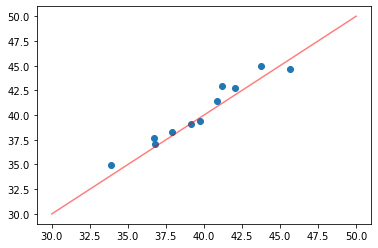

In [367]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

mlr = LinearRegression()

mlr.fit(X_train, y_train)

preds = mlr.predict(X_test)

plt.scatter(y_test, preds)
plt.xlabel("")
plt.ylabel("")

x_axis = np.linspace(30, 50)
y_axis = x_axis
plt.plot(x_axis,y_axis,'r-', alpha=0.5)

In [368]:
mlr.coef_

array([1.54197593, 0.01870164])

In [369]:
X.describe().loc['std']

AMBIENT_TEMPERATURE     1.539231
IRRADIATION            74.904776
Name: std, dtype: float64

In [373]:
# feature importance
abs(mlr.coef_) * X.describe().loc['std'] / (abs(mlr.coef_) * X.describe().loc['std']).iloc[0]

AMBIENT_TEMPERATURE    1.000000
IRRADIATION            0.590212
Name: std, dtype: float64

In [374]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.895021


In [375]:
mlr.score(X_test, y_test)

0.9234051969765322

In [381]:
solar1_day = solar1_day.dropna()
X = solar1_day[['AMBIENT_TEMPERATURE','IRRADIATION']]
y = solar1_day['MODULE_TEMPERATURE']

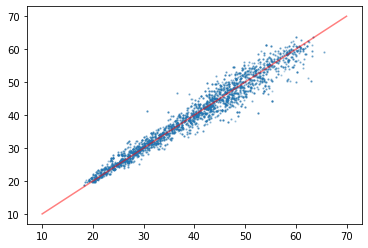

In [386]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

mlr = LinearRegression()

mlr.fit(X_train, y_train)

preds = mlr.predict(X_test)

plt.scatter(y_test, preds, marker='.', alpha=0.1, s=5)
plt.xlabel("")
plt.ylabel("")

x_axis = np.linspace(10, 70)
y_axis = x_axis
plt.plot(x_axis,y_axis,'r-', alpha=0.5)

In [387]:
mlr.coef_

array([ 1.26135252, 28.42478094])

In [388]:
X.describe().loc['std']

AMBIENT_TEMPERATURE    3.182527
IRRADIATION            0.287976
Name: std, dtype: float64

In [393]:
# feature importance
abs(mlr.coef_) * X.describe().loc['std'] / (abs(mlr.coef_) * X.describe().loc['std']).iloc[1]

AMBIENT_TEMPERATURE    0.490405
IRRADIATION            1.000000
Name: std, dtype: float64

In [394]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 2.435569


In [395]:
mlr.score(X_test, y_test)

0.9523779868583427

> 'AMBIENT_TEMPERATURE'와 'IRRADIATION'으로부터 'MODULE_TEMPERATURE'를 예측할 수 있다.
> 따라서 발전량 예측 모델에서 'AMBIENT_TEMPERATURE'와 'IRRADIATION'만으로도 예측이 가능하다고 할 수 있다.

>위 결과는 매일의 데이터를 기계 학습한 결과이다.  
>실시간 발전량은?

In [453]:
X = solar1_day[['AMBIENT_TEMPERATURE', 'IRRADIATION']]
y = solar1_day['AC_POWER']

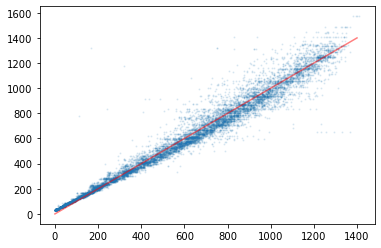

In [454]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

mlr = LinearRegression()

mlr.fit(X_train, y_train)

preds = mlr.predict(X_test)

plt.scatter(y_test, preds, marker='.', alpha=0.1, s=5)
plt.xlabel("")
plt.ylabel("")

x_axis = np.linspace(0, 1400)
y_axis = x_axis
plt.plot(x_axis,y_axis,'r-', alpha=0.5)

In [455]:
mlr.coef_

array([4.44843490e-01, 1.26388059e+03])

In [456]:
X.describe().loc['std']

AMBIENT_TEMPERATURE    3.182527
IRRADIATION            0.287976
Name: std, dtype: float64

In [457]:
# feature importance
abs(mlr.coef_) * X.describe().loc['std'] / (abs(mlr.coef_) * X.describe().loc['std']).iloc[1]

AMBIENT_TEMPERATURE    0.00389
IRRADIATION            1.00000
Name: std, dtype: float64

In [458]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 67.150789


In [459]:
mlr.score(X_test, y_test)

0.9673120444425032

In [460]:
X = solar2_day[['AMBIENT_TEMPERATURE', 'IRRADIATION']]
y = solar2_day['AC_POWER']

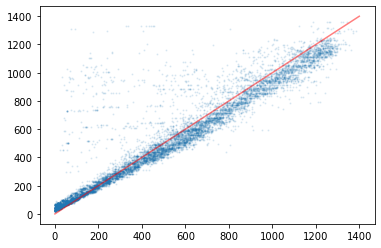

In [461]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

mlr = LinearRegression()

mlr.fit(X_train, y_train)

preds = mlr.predict(X_test)

plt.scatter(y_test, preds, marker='.', alpha=0.1, s=5)
plt.xlabel("")
plt.ylabel("")

x_axis = np.linspace(0, 1400)
y_axis = x_axis
plt.plot(x_axis,y_axis,'r-', alpha=0.5)

In [462]:
mlr.coef_

array([   3.867331 , 1184.7671237])

In [463]:
X.describe().loc['std']

AMBIENT_TEMPERATURE    4.009217
IRRADIATION            0.289762
Name: std, dtype: float64

In [464]:
# feature importance
abs(mlr.coef_) * X.describe().loc['std'] / (abs(mlr.coef_) * X.describe().loc['std']).iloc[1]

AMBIENT_TEMPERATURE    0.045164
IRRADIATION            1.000000
Name: std, dtype: float64

In [465]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 123.656603


In [466]:
mlr.score(X_test, y_test)

0.891320956147738

>실시간 데이터에서, 'AMBIENT_TEMPERATURE', 'IRRADIATION'로 multi linear regression한 결과,  
>'AC_POWER'와 높은 상관 관계를 가지는 것을 알 수 있었다.  
>기상 데이터를 통해 높은 정확도로 발전량을 예측할 수 있었다.

## Conclusions

* 매일 각 인버터의 총 발전량의 변화를 그래프로 그려서 어떤 인버터 그룹에 문제가 생겼는지 확인할 수 있었다.
* 하지만 2 발전소의 경우 각 인버터의 발전량이 제각각이기 때문에 그래프 상에서 어떤 인버터 그룹에 문제가 생겼는지 특정 짓기 힘들었다.
* 따라서 매일 각 인버터의 발전량과 최대 발전량을 내는 인버터를 비교하고 비율을 계산하여, 임의의 기준에 따라 어떤 인버터 그룹에 문제가 생겼는지 규정할 수 있었다.
* 발전량을 예측하기 위해서 10일과 5일 동안의 발전량으로 부터 다음 날의 발전량을 예측하는 모델을 만들었으나 한계가 있었다.
* 따라서 날씨 데이터를 이용하여 발전량 예측을 진행했다.
* 'AMBIENT_TEMPERATURE', 'IRRADIATION’로 부터 multi linear regression 모델을 통해 ‘AC_POWER’ 즉 발전량을 예측할 수 있었다.